# Capstone 2: *National Transit Database*
## *Preprocessing and Training*
***

## 3.1 Table of Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Table of Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Data Dictionary](#3.3_Data_Dictionary)
  * [3.4 Importing the Dependencies](#3.4_Importing_the_Dependencies)
  * [3.5 Importing the Data](#3.5_Importing_the_Data)
  * [3.6 Defining Safety](#3.6_Defining_Safety)
      * [3.6.1 'Total Events' Column](#3.6.1_Total_Events_Column)
      * [3.6.2 Drop Columns Captured by 'Total Events'](#3.6.2_Drop_Columns_Captured_by_Total_Events)
      * [3.6.3 Add ...per 100K VRM Columns](#3.6.3_Add_per_100K_Columns)
      * [3.6.4 Add 'Cumulative Safety' and 'Cumulative Safety per 100K VRM' Columns](#3.6.4_Add_Cumulative_Safety_and_Cumulative_Safety_per_100K_VRM_Columns)


## 3.2 Introduction
<a id='3.2_Introduction'></a>

## 3.3 Data Dictionary
<a id='3.3_Data_Dictionary'></a>
**The data dictionary is repeated in this notebook for ease of referencing**

**Note:** *This table contains only the columns which benefitted from further explanation.  For a complete list of columns, please refer to section 1.5 of this notebook.*



| Column Name | Definition      [FTA Glossary](https://www.transit.dot.gov/ntd/national-transit-database-ntd-glossary)|
|:---------|:-------------|
|5 DIgit NTD ID|National Transit Database ID number currently in use|
|4 Digit NTD ID|Legacy ID number|
|Agency| Name of the Reporting Agency|
|Organization Type|Distinguishes between government, private, and independent public agencies|
|Mode [Definitions](https://www.ftis.org/iNTD-Urban/modes.pdf)|AR: Alaska Railroad|
||CB: Commuter Bus|
||CC: Cable Car|
||CR: Commuter Rail
||DR: Demand Response|
||FB: Ferryboat|
||HR: Heavy Rail|
||IP: Inclined Plane|
||LR: Light Rail|
||MB: Bus|
||MG: Monorail and Automated Guideway|
||PB: Publico|
||RB: Bus Rapid Transit|
||SR: Streetcar Rail|
||TB: Trolleybus|
||TR: Aerial Tramway|
||VP: Vanpool|
||YR: Hybrid Rail
|Type of Service|DO: Directly Operated|
||PT: Purchased Transportation|
||TX: Taxi|
||TN: Transit Network Company (new TOS effective Sept 2019) [NTD Guidance](https://www.transit.dot.gov/sites/fta.dot.gov/files/docs/NTD%202108%20FRN%20Webinar%20Presentation.pdf)|
|Primary UZA Code|*(see note below table)* Numerical ranking by urbanized area population size| 
|Primary UZA Name|*(see note below table)*|
|Primary UZA Sq Miles|*(see note below table)*|
|Primary UZA Population|*(see note below table)*|


**Urbanized Area (UZA):** An urbanized area is an incorporated area with a population of 50,000 or more that is designated as such by the U.S. Department of Commerce, Bureau of the Census.
The Census Bureau delineates urban areas after each decennial census by applying specified criteria to decennial census and other data.

**Non-Rail Modes:**
Transit modes whose vehicles typically operate on roadways - streets, highways or expressways, but may also operate on waterways (ferryboat (FB)) or via aerial cable (aerial tramways (TR)). Vehicles are typically powered by motors onboard the vehicle, with one exception, aerial tramway (TR) vehicles which are electrically powered by a motor not onboard the vehicle in order to pull the vehicle via an overhead cable. 
1.   Aerial Tramway (TR)
2.   Bus (MB)
3.   Bus rapid transit (RB)
4.   Commuter bus (CB)
5.   Demand Response (DR)
6.   Demand taxi (DT)
7.   Ferryboat (FB)
8.   Jitney (JT)
9.   Publico (PB)
10.   Trolleybus (TB), and
11.   Vanpool (VP).


## 3.4 Importing the Dependencies
<a id='3.4_Importing_the_Dependencies'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import groupby

pd.set_option('display.max_rows', 70)

## 3.5 Importing the Data
<a id='3.5_Importing_the_Data'></a>

In [2]:
National_data = pd.read_csv("reduced_data.csv")
Nashville_data = pd.read_csv("Nashville_data.csv")

## 3.6 Defining Safety
<a id='3.6_Defining_Safety'></a>

The FTA requires covered public transportation providers to establish Safety Performance Measures (SPMs) and use them to set annual Safety Perform Targets (SPTs) based.  These targets must depend only on data submittable to the NTD. Since my goal is to assit Nashville in its decision-making, I will use the SPMs of it's largest NTD reporter to guide my definition of safety.  The SPMs and SPTs for the Metropolitan Transit Authority (MTA) dba WeGo Public Transit can be found on page 8 of this document: [MTA Safety Performance Measures](https://www.wegotransit.com/file.aspx?DocumentId=102).  MTA's chosen SPMs match the example given by the FTA in their Safety Performance Targets Guide which can be found here: [FTA SPT Guide](https://www.transit.dot.gov/sites/fta.dot.gov/files/2021-06/SPTs-Guide-v2-20210629.pdf).

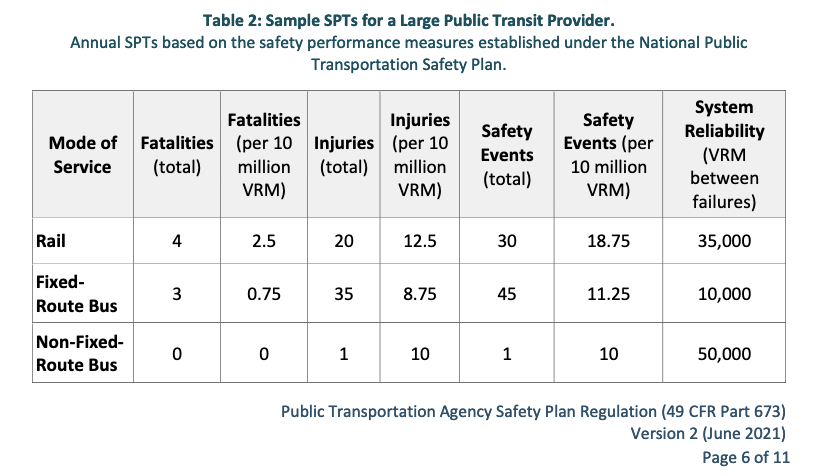

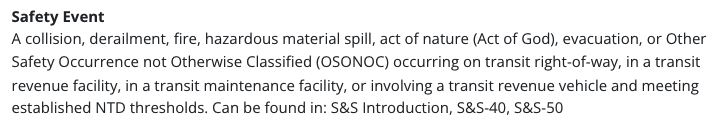

### 3.6.1 'Total Events' Column
<a id='3.6.1_Total_Events_Column'></a>
The NTD database does not have a column called 'Total Safety Events' so I will verify that the 'Toal Events' column is a total of all the events listed in the definition above from given in the [FTA Glossary](https://www.transit.dot.gov/ntd/national-transit-database-ntd-glossary).

In [ ]:
#National_data.info()

In [ ]:
#Nashville_data.info()

In [ ]:
#Check to see if 'Total Events" captures all data in columns 'Total Collisions', 'Total Derailments', 'Total Fires',
#'Total Security Events', and 'Total Events Not Otherwise Classified'

#create a dataframe with all injury columns
National_events = National_data.iloc[:, 18:24]
Nashville_events = Nashville_data.iloc[:, 18:24]
count5 = 0
count6 = 0

for i in National_events.index:
    if sum(National_events.iloc[i,[5]]) != sum(National_events.iloc[i,0:5]):
        count5 += 1
        list5.append(i)

for i in Nashville_events.index:
    if sum(Nashville_events.iloc[i,[5]]) != sum(Nashville_events.iloc[i,0:5]):
        count5 += 1
        list5.append(i)        

print('There are ',count5, "rows where 'Total Events' does not match the sum of the other columns")
print('There are ',count6, "rows where 'Total Events' does not match the sum of the other columns")

Since the 'Total Events' column is confirmed to be the total of the other columns, I can drop the other columns from both the National and Nashville dataframes.

### 3.6.2 Drop Columns Captured by 'Total Events'
<a id='3.6.2_Drop_Columns_Captured_by_Total_Events'></a>

In [ ]:
National_data.shape()

In [ ]:
Nashville_data.shape()

In [3]:
National_data = National_data.drop(National_data.iloc[:, 18:23], axis=1)
Nashville_data = Nashville_data.drop(Nashville_data.iloc[:, 18:23], axis=1)


In [ ]:
National_data.shape

In [ ]:
Nashville_data.shape

Calculate annual totals and make new columns

In [4]:
Quest = Nashville_data

In [ ]:
#why = Quest[['5 DIgit NTD ID','Agency','Organization Type','Type of Service','Year','Month','Mode']][Quest['Year']==2014].sort_values(by=['5 DIgit NTD ID','Year','Month','Mode'])
#why[why['Mode']=='DR']
#Viola - Type of Service account for the two monthly rows of DR

In [6]:
Quest[['Total Fatalities Annual by Mode','Total Injuries Annual by Mode','Total Events Annual by Mode']] = (Quest.groupby(['5 DIgit NTD ID','Agency','Primary UZA Name','Mode','Year'])[['Total Fatalities', 'Total Injuries','Total Events']].transform('sum'))

#df['e'] = (df.groupby(['c', 'd'])['e'].transform('sum'))

Quest[['5 DIgit NTD ID','Agency','Primary UZA Name','Year','Month','Mode','Total Fatalities', 'Total Injuries','Total Events', 'Total Fatalities Annual by Mode','Total Injuries Annual by Mode','Total Events Annual by Mode']].sort_values(by = ['5 DIgit NTD ID','Agency','Primary UZA Name','Year','Month'], ascending=True).head(20)


,5 DIgit NTD ID,Agency,Primary UZA Name,Year,Month,Mode,Total Fatalities,Total Injuries,Total Events,Total Fatalities Annual by Mode,Total Injuries Annual by Mode,Total Events Annual by Mode
32,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,1,MB,0,0,0,1,19,18
33,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,1,DR,0,0,0,0,3,3
39,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,1,DR,0,0,0,0,3,3
6,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,2,MB,0,0,1,1,19,18
34,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,2,DR,0,0,0,0,3,3
40,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,2,DR,0,0,0,0,3,3
7,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,3,MB,0,2,2,1,19,18
35,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,3,DR,0,0,0,0,3,3
41,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,3,DR,0,0,0,0,3,3
8,40004,Metropolitan Transit Authority,"Nashville-Davidson, TN",2014,4,DR,0,1,1,0,3,3


In [15]:
Quest[['5 DIgit NTD ID','Agency','Primary UZA Name','Year','Mode']].drop_duplicates().sort_values(by=['5 DIgit NTD ID','Agency','Primary UZA Name','Year']).shape
#So, if I compact the Nashville dataframe to annual values instead of monthly, I go from 750 rows to 58.

(58, 5)

### 3.6.3 Add ...per 100K VRM Columns
<a id='3.6.3_Add_per_100K_Columns'></a>


In [ ]:
#Monthly but results in NaNs
Nashville_data['Fatalities per 100K VRM'] = (Nashville_data['Total Fatalities']/Nashville_data['Vehicle Revenue Miles'])*100000
Nashville_data['Injuries per 100K VRM'] = (Nashville_data['Total Injuries']/Nashville_data['Vehicle Revenue Miles'])*100000
Nashville_data['Events per 100K VRM'] = (Nashville_data['Total Events']/Nashville_data['Vehicle Revenue Miles'])*100000

Nashville_data[['5 DIgit NTD ID','Year', 'Month','Mode', 'Total Fatalities','Total Injuries','Total Events','Vehicle Revenue Miles', 'Fatalities per 100K VRM','Injuries per 100K VRM','Events per 100K VRM']].sort_values(['5 DIgit NTD ID','Year', 'Month','Mode']).head(10)


In [ ]:
National_data['Fatalities per 100K VRM'] = (National_data['Total Fatalities']/National_data['Vehicle Revenue Miles'])*100000
National_data['Injuries per 100K VRM'] = (National_data['Total Injuries']/National_data['Vehicle Revenue Miles'])*100000
National_data['Events per 100K VRM'] = (National_data['Total Events']/National_data['Vehicle Revenue Miles'])*100000

National_data[['5 DIgit NTD ID','Year', 'Month','Mode', 'Total Fatalities','Total Injuries','Total Events','Vehicle Revenue Miles', 'Fatalities per 100K VRM','Injuries per 100K VRM','Events per 100K VRM']].sort_values(['5 DIgit NTD ID','Year', 'Month','Mode']).head(10)


### 3.6.4 Add 'Cumulative Safety' and 'Cumulative Safety per 100K VRM' Columns
<a id='3.6.4_Add_Cumulative_Safety_and_Cumulative_Safety_per_100K_VRM_Columns'></a>   
    

I will create a column called 'Cumulative Safety' which will be a sum of the 'Total Fatalities', 'Total Injuries', and 'Total Events' for each row.  Then I will add a 'Cumulative Safety per 100K VRM' column.

In [ ]:
Nashville_data['Cumulative Safety'] = (Nashville_data['Total Fatalities'] + Nashville_data['Total Injuries'] + Nashville_data['Total Events'])
National_data['Cumulative Safety'] = (National_data['Total Fatalities'] + National_data['Total Injuries'] + National_data['Total Events'])

Nashville_data['Cumulative Safety per 100K VRM'] = (Nashville_data['Cumulative Safety']/Nashville_data['Vehicle Revenue Miles'])*100000
National_data['Cumulative Safety per 100K VRM'] = (National_data['Cumulative Safety']/National_data['Vehicle Revenue Miles'])*100000


In [ ]:
Nashville_data.info()

In [ ]:
Nashville_data[['5 DIgit NTD ID','Year', 'Month','Mode', 'Total Fatalities','Total Injuries','Total Events','Vehicle Revenue Miles', 'Fatalities per 100K VRM','Injuries per 100K VRM','Events per 100K VRM', 'Cumulative Safety per 100K VRM']].sort_values(['5 DIgit NTD ID','Year', 'Month','Mode']).head(10)


In [ ]:
National_data[['5 DIgit NTD ID','Year', 'Month','Mode', 'Total Fatalities','Total Injuries','Total Events','Vehicle Revenue Miles', 'Fatalities per 100K VRM','Injuries per 100K VRM','Events per 100K VRM', 'Cumulative Safety per 100K VRM']].sort_values(['5 DIgit NTD ID','Year', 'Month','Mode']).head(10)


In [ ]:
Annual_Totals_Nashville = Nashville_data.iloc[:, np.r_[12, 18:26]].groupby('Year').sum()
Annual_Totals_National = National_data.iloc[:, np.r_[12, 18:26]].groupby('Year').sum()

#Annual_Totals_Nashville['Injuries per 100K VRM'] = (Annual_Totals_Nashville['Total Injuries'] / Annual_Totals_Nashville['Vehicle Revenue Miles']) * 100000
#Annual_Totals_Nashville['Fatalities per 100K VRM'] = (Annual_Totals_Nashville['Total Fatalities'] / Annual_Totals_Nashville['Vehicle Revenue Miles']) * 100000
#Annual_Totals_Nashville['Events per 100K VRM'] = (Annual_Totals_Nashville['Total Events'] / Annual_Totals_Nashville['Vehicle Revenue Miles']) * 100000

#Annual_Totals_National['Injuries per 100K VRM'] = (Annual_Totals_National['Total Injuries'] / Annual_Totals_National['Vehicle Revenue Miles']) * 100000
#Annual_Totals_National['Fatalities per 100K VRM'] = (Annual_Totals_National['Total Fatalities'] / Annual_Totals_National['Vehicle Revenue Miles']) * 100000
#Annual_Totals_National['Events per 100K VRM'] = (Annual_Totals_National['Total Events'] / Annual_Totals_National['Vehicle Revenue Miles']) * 100000

#Nashville_and_National = pd.merge(Annual_Totals_Nashville, Annual_Totals_National, on='Year', suffixes=('_Nashville', '_National'))
##Nashville_vs_National = pd.merge(Annual_Totals_Nashville, Annual_Totals_National, on='Year', suffixes=('_Nashville', '_National'))


In [ ]:
Annual_Totals_Nashville

In [ ]:
Annual_Totals_National
#I think NaNs are from times where VRM = 0

In [ ]:
#df = National_data.iloc[:, np.r_[12, 18:26]].groupby('Year').min()
#National_data[National_data['Year']==2020].min()
National_data.isna().sum()

In [ ]:
fig, ax =plt.subplots(1,3, figsize=(18,6), sharex=True, sharey=True)


Nashville_and_National.plot.bar(y=['Injuries per 100K VRM_Nashville', 'Injuries per 100K VRM_National'], ax=ax[0])
#ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Injuries', fontsize=20, pad=30)
ax[0].set_ylabel('Count per 100K VRM')
ax[0].legend(["Nashville", "National"])

Nashville_and_National.plot.bar(y=['Fatalities per 100K VRM_Nashville', 'Fatalities per 100K VRM_National'], ax=ax[1])
#ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Fatalities', fontsize=20, pad=30)
ax[1].legend(["Nashville", "National"])

Nashville_and_National.plot.bar(y=['Events per 100K VRM_Nashville', 'Events per 100K VRM_National'], ax=ax[2])
#ax[2].bar_label(ax[1].containers[0])
ax[2].set_title('Events', fontsize=20, pad=30)
ax[2].legend(["Nashville", "National"])


In [ ]:
#Nashville_and_National['IFE per 100K VRM_Nashville'] = ((Nashville_and_National['Total Injuries_Nashville'] + Nashville_and_National['Total Fatalities_Nashville'] + Nashville_and_National['Total Events_Nashville'])/Nashville_and_National['Vehicle Revenue Miles_Nashville'])*100000
#Nashville_and_National['IFE per 100K VRM_National'] = ((Nashville_and_National['Total Injuries_National'] + Nashville_and_National['Total Fatalities_National'] + Nashville_and_National['Total Events_National'])/Nashville_and_National['Vehicle Revenue Miles_National'])*100000


In [ ]:
Nashville_and_National.plot.bar(y=['IFE per 100K VRM_Nashville', 'IFE per 100K VRM_National'], figsize=(6,6))
plt.title('Cumulative Safety', fontsize=20, pad=30)
plt.ylabel('Count per 100K VRM')
plt.legend(["Nashville", "National"])

In [ ]:
National_data[National_data['Vehicle Revenue Miles']==0]

In [ ]:
National_data.describe()

In [ ]:
Nashville_data.describe()

In [ ]:
Nashville_data.groupby('5 DIgit NTD ID')[['Vehicle Revenue Miles', 'Total Collisions', 'Total Fatalities', 'Total Injuries']].mean()